## Inicializacion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. **Identificación del problema:** 

hacer las preguntas relevantes, entender el problema, definir objetivos y establecer métricas de performance.

In [2]:
##Preguntas Relevantes:

# Predecir clientes con plas probabilidades de darse de baja, Datos que correlacionen


## 2. **Adquisición de los datos:** 

si van a trabajar con un dataset propio, deberán obtener los datos necesarios a partir de múltiples fuentes, como bases de datos o servidores web. Incluso, si están trabajando con alguno de los datasets sugeridos, podrían querer enriquecer la información aportando datos relacionados al problema provenientes de otras fuentes.

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

## 2. **Analisis Inicial:** 


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
data.Churn.value_counts(normalize=True)
#Desbalanceo de clases

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

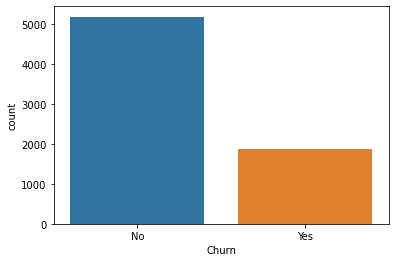

In [8]:
import seaborn as sns
sns.countplot(data=data, x=data.Churn);

for col in data.columns:
    print(col)
    print(data[col].dtype)
    print(data[col].unique())
    print('#'*30)

In [9]:
data.drop(['customerID'],inplace=True, axis=1)

In [10]:
# pasar TotalCharges a tipo numerico
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# fill NaNs with mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [11]:
# fill NaNs with mean
data['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# toma todos los elementos tipo objeto y los transforma en dummies
data_cat = data.select_dtypes('object')
data_dummy = pd.get_dummies(data_cat, drop_first=True)

In [30]:
data_dummy.Churn_Yes

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8

In [31]:
# concatenar dummies con numericos
data_final = pd.concat([data.select_dtypes(exclude='object'), data_dummy.Churn_Yes], axis=1)
data_final.shape

(7043, 5)

<AxesSubplot:>

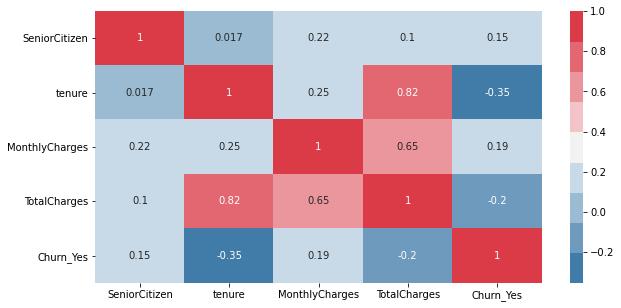

In [32]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(data_final.corr(),annot=True, cmap=sns.diverging_palette(240, 10, n=9))

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data_final.drop(columns='Churn_Yes')
y = data_final['Churn_Yes']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [18]:
X_train.to_csv("DF_Cols.csv")

In [19]:
y_train.to_csv("DF_Target.csv")

In [20]:
X_test.to_csv("DF_Cols_Test.csv")

In [21]:
y_test.to_csv("DF_Target_Test.csv")